In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
pd.set_option('display.max_columns', None)
%matplotlib inline

customer = pd.read_csv('customers.csv')

In [2]:
orders = pd.read_csv('order_details.csv')
# orders.shape

In [3]:
orders.head()

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [4]:
customers_dummy = pd.get_dummies(customer, columns=['Customer Last Name'])

In [5]:
# groupby for similarity per orders
df_X = customers_dummy.groupby(['Offer #']).sum()

In [6]:
df_X.head()

,Customer Last Name_Adams,Customer Last Name_Allen,Customer Last Name_Anderson,Customer Last Name_Bailey,Customer Last Name_Baker,Customer Last Name_Barnes,Customer Last Name_Bell,Customer Last Name_Bennett,Customer Last Name_Brooks,Customer Last Name_Brown,Customer Last Name_Butler,Customer Last Name_Campbell,Customer Last Name_Carter,Customer Last Name_Clark,Customer Last Name_Collins,Customer Last Name_Cook,Customer Last Name_Cooper,Customer Last Name_Cox,Customer Last Name_Cruz,Customer Last Name_Davis,Customer Last Name_Diaz,Customer Last Name_Edwards,Customer Last Name_Evans,Customer Last Name_Fisher,Customer Last Name_Flores,Customer Last Name_Foster,Customer Last Name_Garcia,Customer Last Name_Gomez,Customer Last Name_Gonzalez,Customer Last Name_Gray,Customer Last Name_Green,Customer Last Name_Gutierrez,Customer Last Name_Hall,Customer Last Name_Harris,Customer Last Name_Hernandez,Customer Last Name_Hill,Customer Last Name_Howard,Customer Last Name_Hughes,Customer Last Name_Jackson,Customer Last Name_James,Customer Last Name_Jenkins,Customer Last Name_Johnson,Customer Last Name_Jones,Customer Last Name_Kelly,Customer Last Name_King,Customer Last Name_Lee,Customer Last Name_Lewis,Customer Last Name_Long,Customer Last Name_Lopez,Customer Last Name_Martin,Customer Last Name_Martinez,Customer Last Name_Miller,Customer Last Name_Mitchell,Customer Last Name_Moore,Customer Last Name_Morales,Customer Last Name_Morgan,Customer Last Name_Morris,Customer Last Name_Murphy,Customer Last Name_Myers,Customer Last Name_Nelson,Customer Last Name_Nguyen,Customer Last Name_Ortiz,Customer Last Name_Parker,Customer Last Name_Perez,Customer Last Name_Perry,Customer Last Name_Peterson,Customer Last Name_Phillips,Customer Last Name_Powell,Customer Last Name_Price,Customer Last Name_Ramirez,Customer Last Name_Reed,Customer Last Name_Reyes,Customer Last Name_Richardson,Customer Last Name_Rivera,Customer Last Name_Roberts,Customer Last Name_Robinson,Customer Last Name_Rodriguez,Customer Last Name_Rogers,Customer Last Name_Ross,Customer Last Name_Russell,Customer Last Name_Sanchez,Customer Last Name_Sanders,Customer Last Name_Scott,Customer Last Name_Smith,Customer Last Name_Stewart,Customer Last Name_Sullivan,Customer Last Name_Taylor,Customer Last Name_Thomas,Customer Last Name_Thompson,Customer Last Name_Torres,Customer Last Name_Turner,Customer Last Name_Walker,Customer Last Name_Ward,Customer Last Name_Watson,Customer Last Name_White,Customer Last Name_Williams,Customer Last Name_Wilson,Customer Last Name_Wood,Customer Last Name_Wright,Customer Last Name_Young
Offer #,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
X = df_X.values

# Fit a k-means estimator
estimator = KMeans(n_jobs=-1, n_clusters=5)
estimator.fit(X)
# Clusters are given in the labels_ attribute
labelsKM = estimator.labels_

# Fit a DBSCAN estimator
estimator2 = DBSCAN(eps=2.5, min_samples=3)
estimator2.fit(X)
# Clusters are given in the labels_ attribute
labelsDB = estimator2.labels_

In [8]:
# Merge back the cluster allocation
df_kmean = pd.merge(orders,pd.DataFrame(labelsKM, columns=['Cluster']),
              left_index=True, right_index=True)
# df_kmean.sort_values('Cluster')

In [10]:
df_kmean.head(100)

,Offer #,Campaign,Varietal,Minimum Qty (kg),Discount (%),Origin,Past Peak,Cluster
0,1,January,Malbec,72,56,France,False,1
1,2,January,Pinot Noir,72,17,France,False,0
2,3,February,Espumante,144,32,Oregon,True,0
3,4,February,Champagne,72,48,France,True,1
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,1
5,6,March,Prosecco,144,86,Chile,False,0
6,7,March,Prosecco,6,40,Australia,True,3
7,8,March,Espumante,6,45,South Africa,False,3
8,9,April,Chardonnay,144,57,Chile,False,1
9,10,April,Prosecco,72,52,California,False,0


In [11]:
df_kmean.Cluster.unique()

array([1, 0, 3, 2, 4])

For n_clusters = 2 The average silhouette_score is : 0.179400391861


KeyError: ''

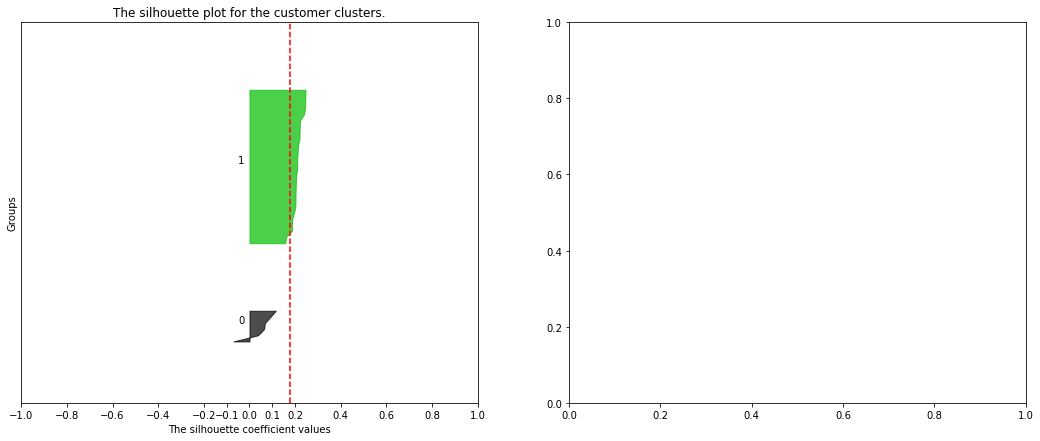

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2,3,4,5,6,7,8]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    #The first subplot is the silhouette plot
    #The silhouette coeffficient can range from -1,1
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)
    
    ax1.set_ylim([0,len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print "For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg
        
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the customer clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Groups")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.8,-0.6,-0.4,-0.2,-0.1, 0, 0.1,0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_kmean[''], df_kmean[''], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data:sepal length vs petal length")
    ax2.set_xlabel("sepal length")
    ax2.set_ylabel("petal length")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Now with PCA

In [15]:
X

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [16]:
# Dimensionality reduction using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)



('Reduced dataset shape:', (32, 3))


In [17]:
# KMeans algorithm
km = KMeans(n_clusters=5)
km.fit(X_reduced)
cluster_pred = km.predict(X_reduced)
PCA_labelsKM = km.labels_
km_means_cluster_centers = km.cluster_centers_

In [18]:
# Merge back the cluster allocation with PCA data
df_kmean = pd.merge(orders,pd.DataFrame(PCA_labelsKM, columns=['PCA_Cluster']),
              left_index=True, right_index=True)

# df_kmean.sort_values('PCA_Cluster')

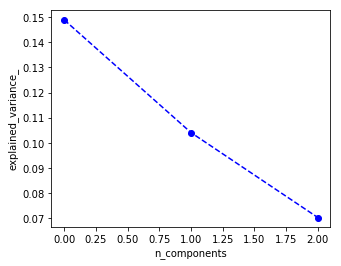

In [19]:
# Plot of the explained Variance
plt.figure(1, figsize=(5, 4))

plt.plot(pca.explained_variance_ratio_, 'bo--')
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

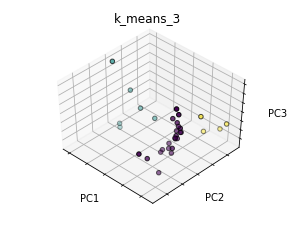

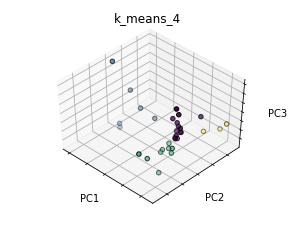

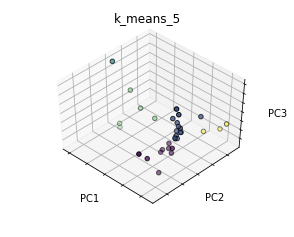

In [20]:
# plot kmeans in 3D
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

X_3D = X_reduced

estimators = [('k_means_3', KMeans(n_clusters=3)),
              ('k_means_4', KMeans(n_clusters=4)),
              ('k_means_5', KMeans(n_clusters=5))]

fignum = 1
titles = ['k_means_3', 'k_means_4', 'k_means_5']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X_3D)
    labels = est.labels_

    ax.scatter(X_3D[:, 0], X_3D[:, 1], X_3D[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


# Silhouette analysis

Reduced dataset shape: (32, 3)
For n_clusters = 2 The average silhouette_score is : 0.60958099716


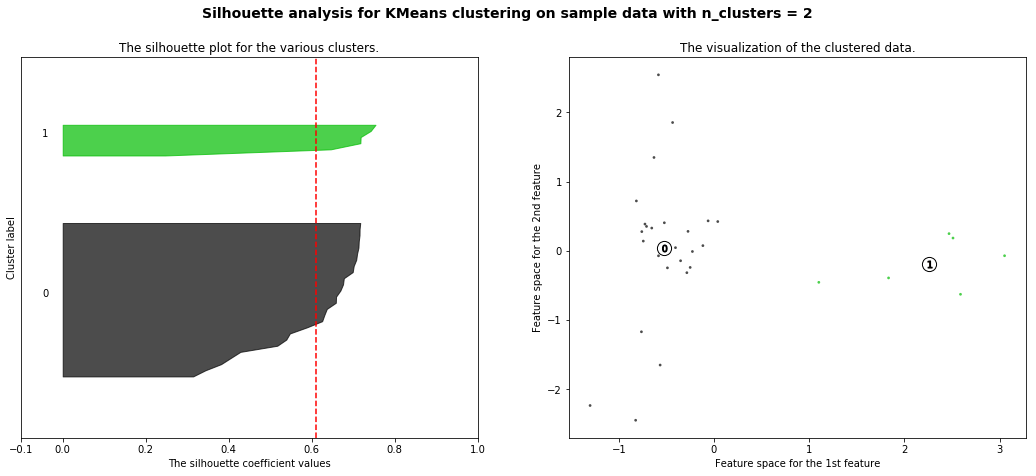

For n_clusters = 3 The average silhouette_score is : 0.640367332745


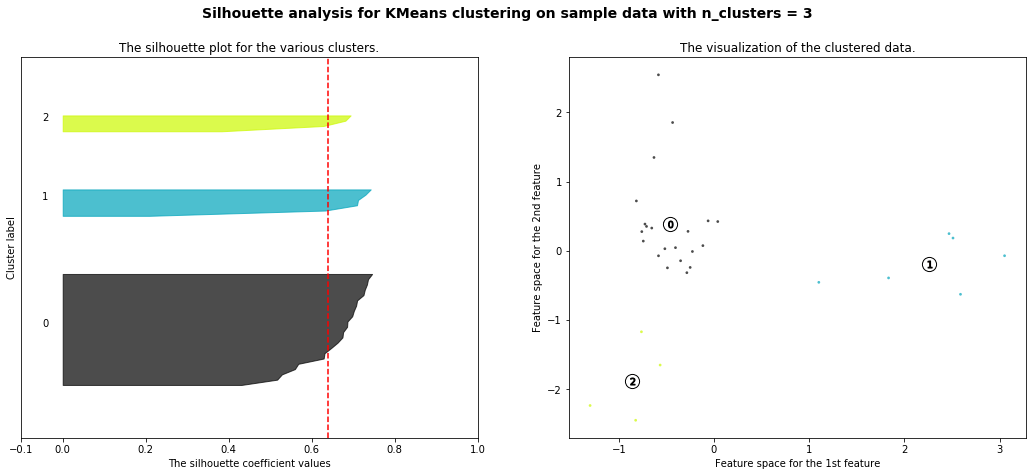

For n_clusters = 4 The average silhouette_score is : 0.647518809248


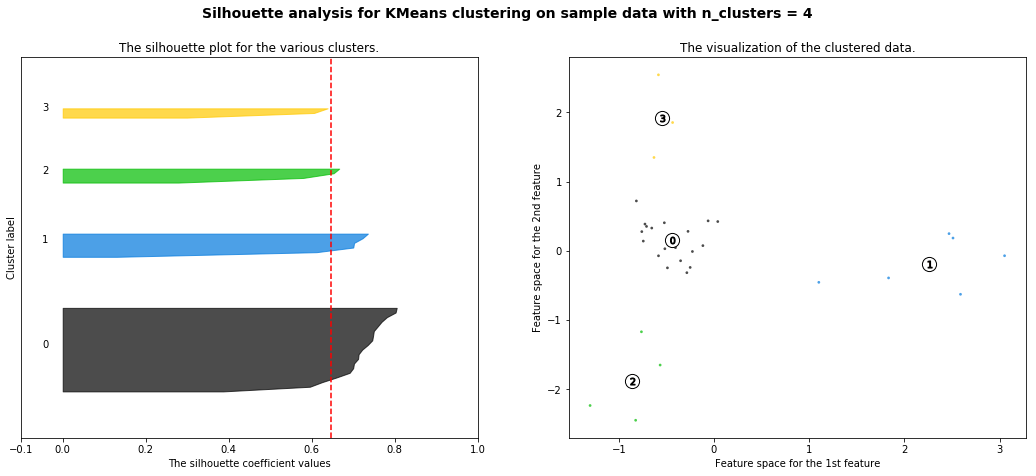

For n_clusters = 5 The average silhouette_score is : 0.62109743282


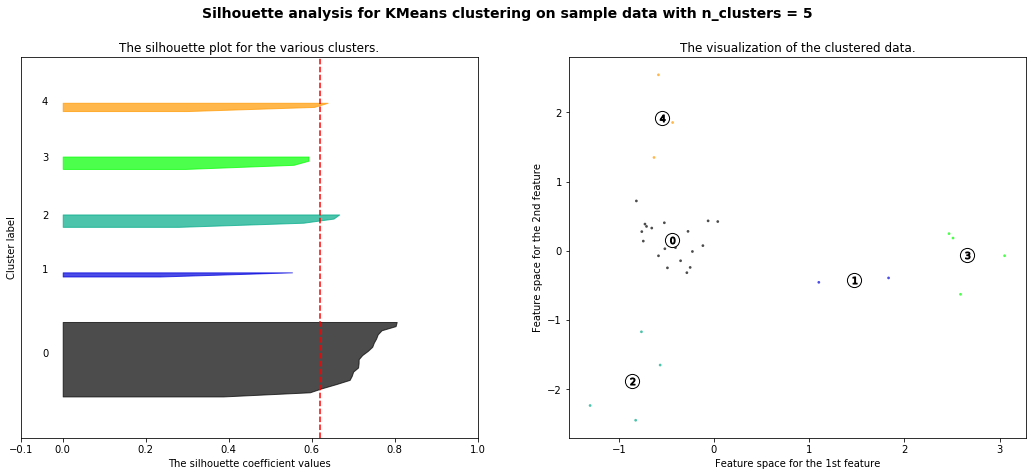

For n_clusters = 6 The average silhouette_score is : 0.451057243426


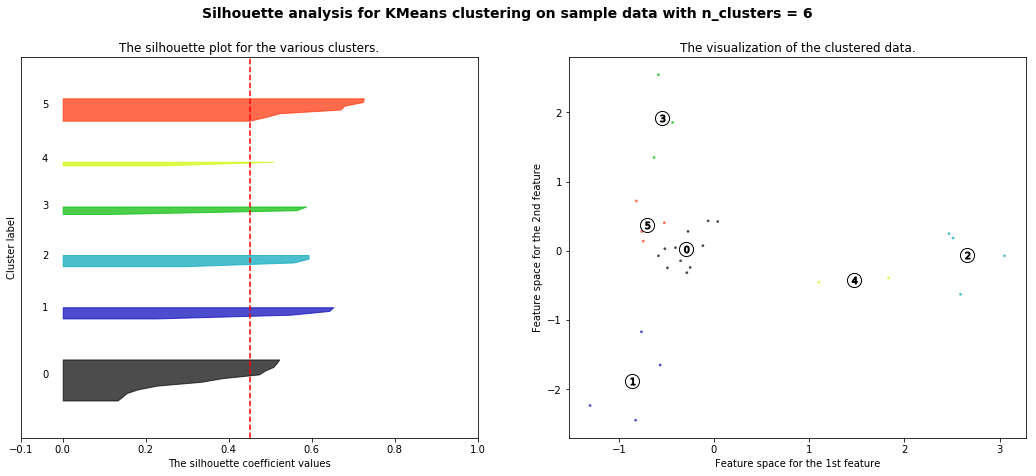

In [21]:
# Silhouette analysis
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)


range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()